In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import os

In [2]:
import requests
from config import weather_api_key

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.222951855190985 142.70502785871514
-50.90195194379438 123.0181982577401
37.758074798879505 143.45707137975705
-64.2393806903398 91.31924895567937
54.140401863321955 149.91369981181714
88.56041053516219 174.0130768978163
35.828582234533016 -168.51418014667783
85.91087731324447 71.61411495448874
-0.5094155045929227 166.92875914400986
-2.624153283642741 177.57636235296036
-76.55405817044235 10.938458835074442
-64.58121437372782 130.44624091050218
-71.42776774881162 -171.44574017822987
43.02636631546426 -5.876678931835386
33.456743976073824 -11.005775648609784
-27.332238010086698 -77.09656796655986
-59.944375460234866 153.4301596942858
-87.45791324643967 56.44541732123574
59.966735031796446 -98.33538532178488
80.69914761158742 -22.814171559945862
-21.685526173318948 -153.8168404184458
70.10605135416057 -110.8972492117076
-38.81519661526708 -40.71798818536806
1.6923415081470807 -156.7730323664948
-10.062681762240388 64.38159128962326
-7.707904503311227 -84.35882435728684
-44.875953285915

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

277

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")


    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tateyama
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kamaishi
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | rungata
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | lena
Processing Record 15 of Set 1 | asfi
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | avera
Processing Record 

Processing Record 40 of Set 4 | mirskoy
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | tubuala
Processing Record 43 of Set 4 | kissidougou
Processing Record 44 of Set 4 | tres lagoas
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | biltine
Processing Record 47 of Set 4 | wanning
Processing Record 48 of Set 4 | zeya
Processing Record 49 of Set 4 | kondinskoye
Processing Record 50 of Set 4 | buchanan
Processing Record 1 of Set 5 | pangoa
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | virginia beach
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | macia
Processing Record 7 of Set 5 | san quintin
Processing Record 8 of Set 5 | surt
Processing Record 9 of Set 5 | okhotsk
Processing Record 10 of Set 5 | sarankhola
Processing Record 11 of Set 5 | adrar
Processing Record 12 of Set 5 | tanout
Processing Record 13 of Set 5 | anadyr
Processing Record 14 of Set 5 | marzuq
P

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tateyama,34.9833,139.8667,63.95,87,100,17.98,JP,2022-10-18 02:50:38
1,Albany,42.6001,-73.9662,51.94,94,100,5.39,US,2022-10-18 02:50:39
2,Kamaishi,39.2667,141.8833,58.71,43,93,4.03,JP,2022-10-18 02:50:39
3,Busselton,-33.6500,115.3333,63.39,58,0,4.23,AU,2022-10-18 02:50:39
4,Vostok,46.4856,135.8833,34.02,50,96,14.50,RU,2022-10-18 02:50:40
5,Pevek,69.7008,170.3133,4.42,94,68,4.83,RU,2022-10-18 02:50:40
6,Kapaa,22.0752,-159.3190,84.18,73,20,10.36,US,2022-10-18 02:50:40
7,Dikson,73.5069,80.5464,32.85,98,100,26.35,RU,2022-10-18 02:50:40
8,Hermanus,-34.4187,19.2345,56.80,91,99,6.42,ZA,2022-10-18 02:50:41
9,New Norfolk,-42.7826,147.0587,63.91,33,100,5.64,AU,2022-10-18 02:50:41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [3]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1666139280.581248

In [6]:
cities_data = os.path.join('weather_data','cities.csv')
cities_data_df = pd.read_csv(cities_data)

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = cities_data_df["Lat"]
max_temps = cities_data_df["Max Temp"]
humidity = cities_data_df["Humidity"]
cloudiness = cities_data_df["Cloudiness"]
wind_speed = cities_data_df["Wind Speed"]

In [8]:
today = time.strftime("%x")
today

'10/18/22'

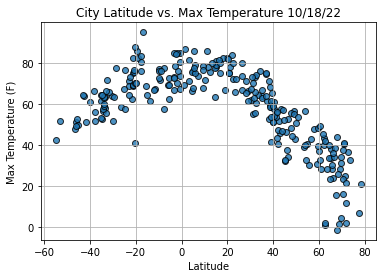

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

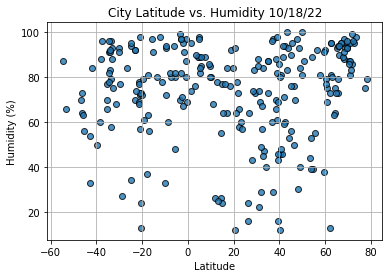

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

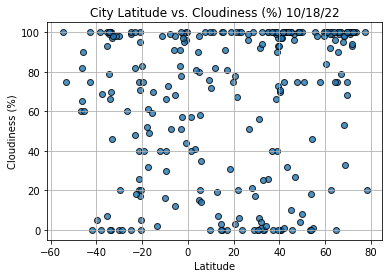

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

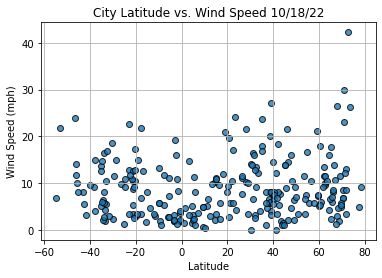

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()